# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

In [1]:
import time
started_at = time.time()
print started_at

1549327354.89


## Condições do experimento

* Quantidade limitada de arestas
* Todas as features
* Quantidade variável de n_estimators

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [2]:
max_edges = 160000 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"
n_estimators = 20
features = 'all'

In [3]:
# Parameters
n_estimators = 20
max_edges = 1000
features = "all_except_network_metrics"


## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [4]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [5]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 1000 edges out of 229338 available (0.44% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [6]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [7]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [8]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [9]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [10]:
if features == 'all':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'degree',
        'eigenvector_centrality',
        'betweenness_centrality',
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]
    
elif features == 'all_except_network_metrics':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]

elif features == 'none':
    
    categorical_features = []

    numeric_features = []

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [11]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [12]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [13]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,323.000000,323,323,323,318,319,0.0,100,222,222,222,217,186,159,71,3,0.0,0.0,0.0,320,320,320,323.0,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,3.230000e+02,323.000000,323.000000,323.000000
unique,NaN,323,323,281,2,80,NaN,98,1,1,7,16,24,37,25,2,NaN,NaN,NaN,320,320,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Introduction to Differential Geometry of Space...,https://www.amazon.com.br/dp/0521864496/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,25 de agosto de 2017,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Matemática Pura,Probabilidade e Estatística,Abstrata,NaN,NaN,NaN,0465054722,978-0070542341,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,5,205,60,NaN,2,222,222,191,166,94,28,9,2,NaN,NaN,NaN,1,1,289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1223.699690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,291.249474,138728.398134,444.309082,4.770155,4.618436,16.569220,23.543504,2.465214,518.774013,2.021522e+09,0.031843,5.702786,0.012683
std,983.671554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,360.652378,94956.841388,255.629856,3.284347,0.299609,2.560235,2.103398,1.150573,212.103858,1.181879e+09,0.044428,12.686554,0.036212
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.970000,1053.000000,48.000000,1.000000,1.000000,10.000000,17.000000,0.500000,40.800000,1.612626e+07,0.000665,1.000000,0.000000
25%,94.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,59.735000,66626.500000,282.500000,4.760000,4.621333,14.600000,22.200000,1.600000,381.000000,1.053793e+09,0.005899,1.000000,0.000000
50%,1713.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,127.160000,141485.441558,388.000000,4.760000,4.621333,16.000000,23.400000,2.300000,523.418147,1.958414e+09,0.015397,2.000000,0.002312
75%,1989.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,437.280000,153475.500000,560.000000,4.760000,4.621333,18.400000,24.700000,3.200000,649.000000,2.932558e+09,0.041038,5.000000,0.008713


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [14]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.00,4.000000,14.0,21.0,0.6,181.0,3564330554,0.060815,19,0.047469
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.00,4.600000,14.6,21.0,1.9,363.0,1309098117,0.222710,62,0.106496
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,4.76,4.621333,14.4,20.8,0.8,200.0,1260550007,0.228632,59,0.102072
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.00,4.500000,13.7,21.5,1.6,381.0,4012708477,0.074234,18,0.047368
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.00,4.500000,13.8,21.8,4.0,939.0,3891707921,0.302139,88,0.239726
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.00,5.000000,13.8,21.5,2.2,581.0,2030201243,0.147241,43,0.118206
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,4.76,4.621333,13.7,21.5,0.8,159.0,744636978,0.032750,9,0.010875
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.00,5.000000,13.8,21.6,1.0,159.0,425205287,0.013043,10,0.045748
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,4.76,4.621333,13.6,20.3,2.3,522.0,1246026773,0.089906,23,0.067611
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciên

## Random forest using various features, price as target

### Preparing data

In [15]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price
Test percentage:  0.201238390093
Train features shape:  (258, 475)
Train target shape:  (258,)
Test features shape:  (65, 475)
Test target shape:  (65,)


### Average price and median price as baselines

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [16]:
average_target = np.average(target)
median_target = np.median(target)
print "Average price: R$", average_target
print "Median parice; R$", median_target

Average price: R$ 274.4988759689922
Median parice; R$ 117.735


### Cross val

#### Run cross val

In [17]:
estimators, splits, scores = shared_functions.run_cross_validation_regression(features, target, n_estimators)

#### Cross val score

In [18]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.569557335381167
RF relative abs std:  0.20652460781346868
Baseline (average) relative mean:  2.375042742914158
Baseline (average) relative std:  0.3571238409456862
Baseline (median) relative mean:  0.9388541396935448
Baseline (median) relative std:  0.1275004381803674
=== Absolute
RF abs mean:  129.7349632307692
RF abs std:  39.76835526670839
Baseline (average) mean:  241.99754029815145
Baseline (average) std:  48.17234446397145
Baseline (median) mean:  213.99025076923076
Baseline (median) std:  72.93686865767991


####  List of most important features

In [19]:
shared_functions.get_most_important_features(estimators, feature_list)

,feature,mean importance,std,std/mean
0,coverType_Capa dura,31.715192,3.700816,0.116689
1,publisher_Cengage Learning,5.878092,3.434368,0.584266
2,authors_S. M. Neill C. M. Ridley (Autor),4.971666,2.068162,0.415990
3,pages,4.910039,1.853725,0.377538
4,"authors_Stephen T. Thornton (Autor),",4.557208,2.379277,0.522091
5,sha256_id,4.165568,1.100222,0.264123
6,ranking,3.879778,1.325809,0.341723
7,depth,3.044010,1.039287,0.341420
8,weight,2.770296,0.709073,0.255956
9,height,2.703792,0.849640,0.314240


### Predicted price vs real price

Splits quantity:  10
Splits lenghts:  [26, 26, 26, 26, 26, 26, 26, 26, 25, 25]
X shape:  (258, 475)
y shape:  (258,)


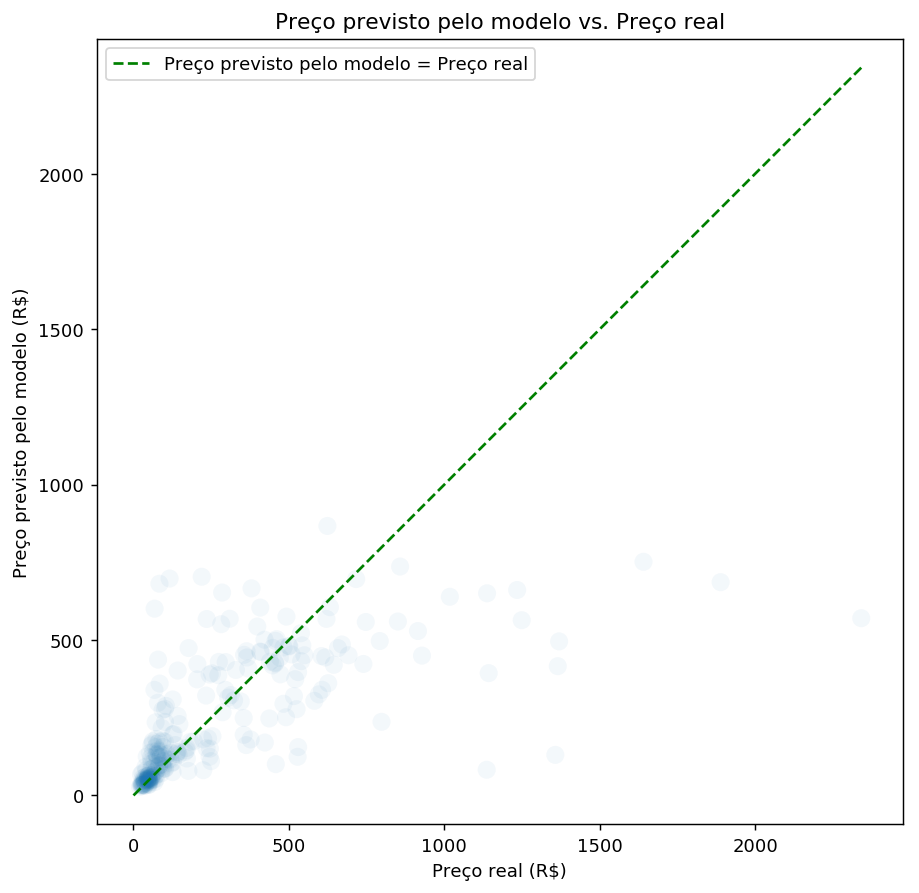

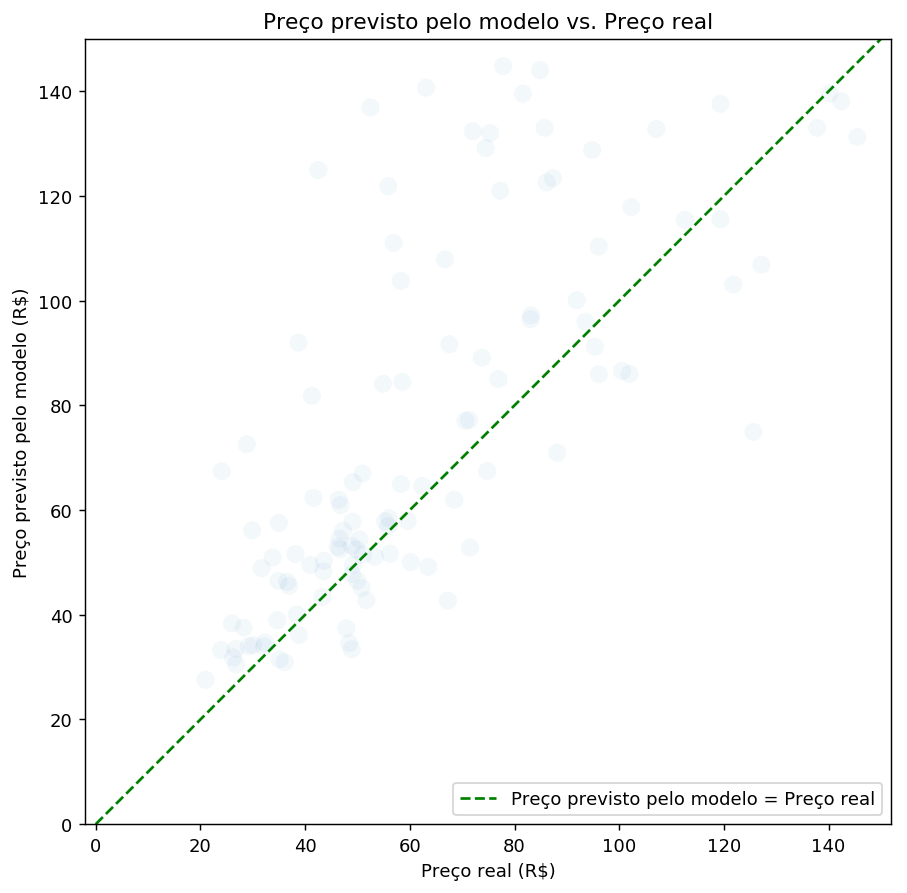

In [20]:
y_pred = shared_functions.get_all_predictions_from_splits(features, target, splits, estimators)                                                  
shared_functions.plot_splits_predicted_vs_real(target, y_pred, title=u'Preço previsto pelo modelo vs. Preço real', xlabel=u'Preço real (R$)', ylabel=u'Preço previsto pelo modelo (R$)', legend=u'Preço previsto pelo modelo = Preço real', zoomY = 150)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [21]:
errors, errors_baseline, errors_relative, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative = shared_functions.print_mean_absolute_error(y_pred, target, average_target, median_target)

== Absolute
('Mean absolute prediction error: R$', 129.4)
('Std prediction error: R$', 220.43)
('Mean absolute error using average: R$', 241.39)
('Std prediction error using average: R$', 234.4)
('Mean absolute error using median: R$', 213.04)
('Std prediction error using median: R$', 303.98)
== Relative
('Mean relative absolute prediction error: ', 0.57)
('Std relative prediction error: ', 0.91)
('Mean relative absolute error using average: ', 2.38)
('Std relative prediction error using average: ', 2.48)
('Mean absolute error using median: R$', 0.94)
('Std prediction error using median: R$', 0.78)


### Join data

In [22]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, features, target, y_pred, errors, errors_relative, errors_baseline, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [23]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.731114e+09,"[1731113829.0, 141485.441558, 4.76, 688.0, 523...",1771.0930,2066.701124,2223.465,0.949712,0.882753,0.756489,570.1070,2341.20,1779,Modern Physics for Scientists and Engineers,https://www.amazon.com.br/dp/1133103723/,"Stephen T. Thornton (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1133103723,978-1133103721,Inglês,1,2341.20,141485.441558,688.000000,4.76,4.621333,20.300000,25.400000,3.200000,523.418147,0.015397,1,0.000000
1.993779e+09,"[1993779221.0, 141485.441558, 4.76, 449.166666...",1226.6115,1082.501124,1239.265,0.913239,0.797716,0.903914,130.3885,1357.00,1716,A VULVA 2 Ed 2003,https://www.amazon.com.br/dp/8126532289/,S. M. Neill C. M. Ridley (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8126532289,978-8126532285,Inglês,1,1357.00,141485.441558,449.166667,4.76,4.621333,16.651585,23.610375,2.492795,523.418147,0.090541,8,0.013874
9.158984e+07,"[91589843.0, 311760.0, 4.76, 545.0, 523.418146...",1202.7270,1614.261124,1771.025,0.937665,0.854667,0.636781,686.0330,1888.76,1712,Vector Calculus,https://www.amazon.com.br/dp/1429215089/,"Jerrold E. Marsden (Autor),",Capa dura,W.H. Freeman & Company,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Análise Vetorial,NaN,NaN,NaN,NaN,1429215089,978-1429215084,Inglês,1,1888.76,311760.000000,545.000000,4.76,4.621333,21.000000,26.000000,3.200000,523.418147,0.027205,2,0.001912
1.088718e+09,"[1088718135.0, 141485.441558, 4.76, 224.0, 308...",1053.7160,861.781124,1018.545,0.896386,0.758423,0.927338,82.5640,1136.28,1830,Geometric Algebra,https://www.amazon.com.br/dp/0471608394/,E. Artin (Autor),Capa comum,Wiley-Blackwell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0471608394,978-0471608394,Inglês,1,1136.28,141485.441558,224.000000,4.76,4.621333,14.700000,22.900000,1.200000,308.000000,0.097890,12,0.014453
2.866815e+09,"[2866815273.0, 214548.0, 4.76, 839.0, 523.4181...",949.1530,1090.441124,1247.205,0.913743,0.798893,0.695381,415.7870,1364.94,317,Mathematical Methods in the Physical Sciences,https://www.amazon.com.br/dp/0471198269/,Mary L. Boas (Autor),Capa dura,John Wiley & Sons,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Física Matemática,NaN,NaN,NaN,NaN,NaN,0471198269,978-0471198260,Inglês,1,1364.94,214548.000000,839.000000,4.76,4.621333,18.300000,25.500000,3.400000,523.418147,0.021295,2,0.004564
2.413888e+09,"[2413888158.0, 380246.0, 4.76, 1040.0, 523.418...",889.0895,1366.171124,1522.935,0.928240,0.832691,0.541906,751.5805,1640.67,1749,Advanced Engineering Electromagnetics,https://www.amazon.com.br/dp/0470589485/,Constantine A. Balanis (Autor),Capa dura,Wiley,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Elétrica e Eletrônica,Teoria Eletromagnética,NaN,NaN,NaN,NaN,0470589485,978-0470589489,Inglês,1,1640.67,380246.000000,1040.000000,4.76,4.621333,19.100000,26.100000,2.900000,523.418147,0.020159,2,0.005085
1.159398e+09,"[1159397835.0, 141485.441558, 4.76, 603.0, 523...",873.6985,1094.681124,1251.445,0.914011,0.799516,0.638118,495.4815,1369.18,1703,Mathematical Statistics and Data Analysis [Wit...,https://www.amazon.com.br/dp/0534399428/,John A. Rice (Autor),Capa dura,Duxbury Resource Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8131519546,978-8131519547,Inglês,1,1369.18,141485.441558,603.000000,4.76,4.621333,18.400000,23.500000,3.200000,523.418147,0.002731,1,0.000000
3

### Worst relative predictions

In [24]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9.139033e+08,"[913903309.0, 10326.0, 6.0, 600.0, 523.4181467...",532.8995,206.598876,49.835,0.733947,3.042693,7.848299,600.7995,67.90,219,Os elementos,https://www.amazon.com.br/dp/8571399352/,Irineu Bicudo (Autor),Capa dura,UNESP,NaN,NaN,Livros,Livros,Ciências,Matemática,Geometria e Topologia,NaN,NaN,NaN,NaN,NaN,NaN,8571399352,978-8571399358,Português,1,67.90,10326.000000,600.0,6.00,4.100000,16.6,23.0,3.6,523.418147,0.003099,1,0.000000
1.487078e+08,"[148707819.0, 198305.0, 1.0, 416.0, 739.0, 24....",597.5945,191.058876,34.295,0.411014,2.289776,7.161967,681.0345,83.44,2252,Maker of Patterns – An Autobiography Through L...,https://www.amazon.com.br/dp/0871403862/,Freeman Dyson (Autor),Capa dura,Liveright,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0871403862,978-0871403865,Inglês,1,83.44,198305.000000,416.0,1.00,5.000000,16.8,24.4,3.6,739.000000,0.003941,1,0.000000
1.879984e+09,"[1879983517.0, 428052.0, 4.76, 400.0, 590.0, 2...",581.5850,158.368876,1.605,0.013821,1.363721,5.008051,697.7150,116.13,1853,Burn Math Class: And Reinvent Mathematics for ...,https://www.amazon.com.br/dp/0465053734/,Jason Wilkes (Autor),Capa dura,Basic Books,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0465053734,978-0465053735,Inglês,1,116.13,428052.000000,400.0,4.76,4.621333,16.5,24.1,3.8,590.000000,0.011591,2,0.002624
1.137125e+09,"[1137125358.0, 137831.0, 4.76, 296.0, 599.0, 2...",357.9030,195.498876,38.735,0.490316,2.474669,4.530418,436.9030,79.00,308,The Mathematics Lover`s Companion – Masterpiec...,https://www.amazon.com.br/dp/0300223005/,Edward R. Scheinerman (Autor),Capa dura,Yale University Press,NaN,2 de maio de 2017,Livros,Livros,Inglês e Outras Línguas,"Política, Filosofia e Ciências Sociais",Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,0300223005,978-0300223002,Inglês,1,79.00,137831.000000,296.0,4.76,4.621333,16.5,23.5,2.5,599.000000,0.005899,1,0.000000
1.424523e+09,"[1424522791.0, 148992.0, 4.76, 300.0, 363.0, 2...",272.0725,207.088876,50.325,0.746551,3.072079,4.036085,339.4825,67.41,1886,The Circle: A Mathematical Exploration beyond ...,https://www.amazon.com.br/dp/1633881679/,"Alfred S. Posamentier (Autor),",Capa dura,Prometheus Books,NaN,23 de agosto de 2016,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Geometria e Topologia,Geometria Algébrica,NaN,NaN,NaN,NaN,1633881679,978-1633881679,Inglês,1,67.41,148992.000000,300.0,4.76,4.621333,16.0,23.6,3.0,363.000000,0.026069,2,0.001145
4.161038e+09,"[4161037885.0, 342755.0, 1.0, 336.0, 567.0, 24...",275.4660,190.168876,33.405,0.396122,2.255056,3.266524,359.7960,84.33,1854,The Magic of Math: Solving for x and Figuring ...,https://www.amazon.com.br/dp/0465054722/,Arthur Benjamin (Autor),Capa dura,Basic Books,NaN,8 de setembro de 2015,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0465054722,978-0465054725,Inglês,1,84.33,342755.000000,336.0,1.00,5.000000,16.8,24.5,2.9,567.000000,0.003099,1,0.000000
2.631946e+09,"[2631945554.0, 213595.0, 4.76, 240.0, 408.0, 2...",219.5250,196.008876,39.245,0.500000,2.497246,2.796853,298.0150,78.49,1864,Arithmetic,https://www.amazon.com.br/dp/0674972236/,Paul Lockhart (Autor),Capa dura,Harvard University Press,NaN,25 de agosto de 2017,Livros,Livros,Inglês e Outras Línguas,Religião e Espiritualidade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0674972236,978-0674972230,Inglês,1,78.49

### Best absolute predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.324115e+09,"[1324114802.0, 60391.0, 4.76, 224.0, 227.0, 21...",0.0965,231.188876,74.425,1.718425,5.338002,0.002228,43.4065,43.31,1832,Asymptotic Methods in Analysis,https://www.amazon.com.br/dp/0486642216/,"N. G. de Bruijn (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,0486642216,978-0486642215,Inglês,1,43.31,60391.000000,224.0,4.76,4.621333,14.0,21.6,1.2,227.000000,0.095152,13,2.244693e-02
2.675808e+09,"[2675808190.0, 199113.0, 4.76, 180.0, 290.0, 2...",0.4065,223.478876,66.715,1.307624,4.380221,0.007967,51.4265,51.02,2114,Problems in Geometry: Theorems and Problems,https://www.amazon.com.br/dp/1984978276/,Richard S Hammond (Autor),Capa comum,Createspace Independent Publishing Platform,NaN,1 de fevereiro de 2018,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Geometria e Topologia,NaN,NaN,NaN,NaN,NaN,1984978276,978-1984978271,Inglês,1,51.02,199113.000000,180.0,4.76,4.621333,14.0,21.6,1.1,290.000000,0.003797,2,1.032923e-02
6.372758e+08,"[637275760.0, 6645.0, 4.76, 400.0, 363.0, 21.6...",0.4695,225.378876,68.615,1.396885,4.588332,0.009558,49.5895,49.12,45,"Tensors, Differential Forms, and Variational P...",https://www.amazon.com.br/dp/0486658406/,"David Lovelock (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Análise Vetorial,NaN,NaN,NaN,NaN,0486658406,978-0486658407,Inglês,1,49.12,6645.000000,400.0,4.76,4.621333,13.7,21.6,1.9,363.000000,0.020749,2,2.908589e-03
4.237676e+09,"[4237676055.0, 141485.441558, 4.76, 198.0, 340...",0.6090,134.288876,22.475,0.160295,0.957770,0.004343,139.6010,140.21,336,A Student's Guide to Infinite Series and Seque...,https://www.amazon.com.br/dp/1107640482/,Bernhard W. Bach Jr. (Autor),Capa comum,Cambridge University Press,NaN,17 de maio de 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1107640482,978-1107640481,Inglês,1,140.21,141485.441558,198.0,4.76,4.621333,15.2,22.8,1.1,340.000000,0.004581,1,0.000000e+00
3.446718e+09,"[3446718112.0, 102458.0, 4.76, 288.0, 295.0, 2...",1.0100,218.588876,61.825,1.105795,3.909656,0.018065,56.9200,55.91,88,Concepts of Space: The History of Theories of ...,https://www.amazon.com.br/dp/0486271196/,Max Jammer (Autor),Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,NaN,NaN,NaN,NaN,NaN,NaN,0486271196,978-0486271194,Inglês,1,55.91,102458.000000,288.0,4.76,4.621333,13.8,21.5,1.4,295.000000,0.003378,1,0.000000e+00
2.019508e+09,"[2019507911.0, 33224.0, 4.76, 256.0, 299.0, 21...",1.2015,225.528876,68.765,1.404227,4.605450,0.024535,47.7685,48.97,21,Challenging Mathematical Problems with Element...,https://www.amazon.com.br/dp/0486655369/,"A. M. Yaglom (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,0486655369,978-0486655369,Inglês,1,48.97,33224.000000,256.0,4.76,4.621333,13.7,21.5,1.2,299.000000,0.014624,4,1.737684e-03
1.476068e+09,"[1476068099.0, 173057.0, 4.76, 168.0, 132.0, 1...",1.6340,236.098876,79.335,2.066016,6.148408,0.042552,40.0340,38.40,1454,Applied Mathematics: A Very Short Introduction,https://www.amazon.com.br/dp/0198754043/,Alain Goriely (Autor),Capa comum,OUP Oxford,NaN,22 de fevereiro de 2018,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,NaN,NaN,NaN,NaN

### Best relative predictions

In [26]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.324115e+09,"[1324114802.0, 60391.0, 4.76, 224.0, 227.0, 21...",0.0965,231.188876,74.425,1.718425,5.338002,0.002228,43.4065,43.31,1832,Asymptotic Methods in Analysis,https://www.amazon.com.br/dp/0486642216/,"N. G. de Bruijn (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,0486642216,978-0486642215,Inglês,1,43.31,60391.000000,224.0,4.76,4.621333,14.0,21.6,1.2,227.000000,0.095152,13,2.244693e-02
2.675808e+09,"[2675808190.0, 199113.0, 4.76, 180.0, 290.0, 2...",0.4065,223.478876,66.715,1.307624,4.380221,0.007967,51.4265,51.02,2114,Problems in Geometry: Theorems and Problems,https://www.amazon.com.br/dp/1984978276/,Richard S Hammond (Autor),Capa comum,Createspace Independent Publishing Platform,NaN,1 de fevereiro de 2018,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Geometria e Topologia,NaN,NaN,NaN,NaN,NaN,1984978276,978-1984978271,Inglês,1,51.02,199113.000000,180.0,4.76,4.621333,14.0,21.6,1.1,290.000000,0.003797,2,1.032923e-02
6.372758e+08,"[637275760.0, 6645.0, 4.76, 400.0, 363.0, 21.6...",0.4695,225.378876,68.615,1.396885,4.588332,0.009558,49.5895,49.12,45,"Tensors, Differential Forms, and Variational P...",https://www.amazon.com.br/dp/0486658406/,"David Lovelock (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Análise Vetorial,NaN,NaN,NaN,NaN,0486658406,978-0486658407,Inglês,1,49.12,6645.000000,400.0,4.76,4.621333,13.7,21.6,1.9,363.000000,0.020749,2,2.908589e-03
4.237676e+09,"[4237676055.0, 141485.441558, 4.76, 198.0, 340...",0.6090,134.288876,22.475,0.160295,0.957770,0.004343,139.6010,140.21,336,A Student's Guide to Infinite Series and Seque...,https://www.amazon.com.br/dp/1107640482/,Bernhard W. Bach Jr. (Autor),Capa comum,Cambridge University Press,NaN,17 de maio de 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1107640482,978-1107640481,Inglês,1,140.21,141485.441558,198.0,4.76,4.621333,15.2,22.8,1.1,340.000000,0.004581,1,0.000000e+00
3.446718e+09,"[3446718112.0, 102458.0, 4.76, 288.0, 295.0, 2...",1.0100,218.588876,61.825,1.105795,3.909656,0.018065,56.9200,55.91,88,Concepts of Space: The History of Theories of ...,https://www.amazon.com.br/dp/0486271196/,Max Jammer (Autor),Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,NaN,NaN,NaN,NaN,NaN,NaN,0486271196,978-0486271194,Inglês,1,55.91,102458.000000,288.0,4.76,4.621333,13.8,21.5,1.4,295.000000,0.003378,1,0.000000e+00
2.019508e+09,"[2019507911.0, 33224.0, 4.76, 256.0, 299.0, 21...",1.2015,225.528876,68.765,1.404227,4.605450,0.024535,47.7685,48.97,21,Challenging Mathematical Problems with Element...,https://www.amazon.com.br/dp/0486655369/,"A. M. Yaglom (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,NaN,NaN,NaN,NaN,NaN,NaN,0486655369,978-0486655369,Inglês,1,48.97,33224.000000,256.0,4.76,4.621333,13.7,21.5,1.2,299.000000,0.014624,4,1.737684e-03
1.476068e+09,"[1476068099.0, 173057.0, 4.76, 168.0, 132.0, 1...",1.6340,236.098876,79.335,2.066016,6.148408,0.042552,40.0340,38.40,1454,Applied Mathematics: A Very Short Introduction,https://www.amazon.com.br/dp/0198754043/,Alain Goriely (Autor),Capa comum,OUP Oxford,NaN,22 de fevereiro de 2018,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,NaN,NaN,NaN,NaN

### Relative errors distribution

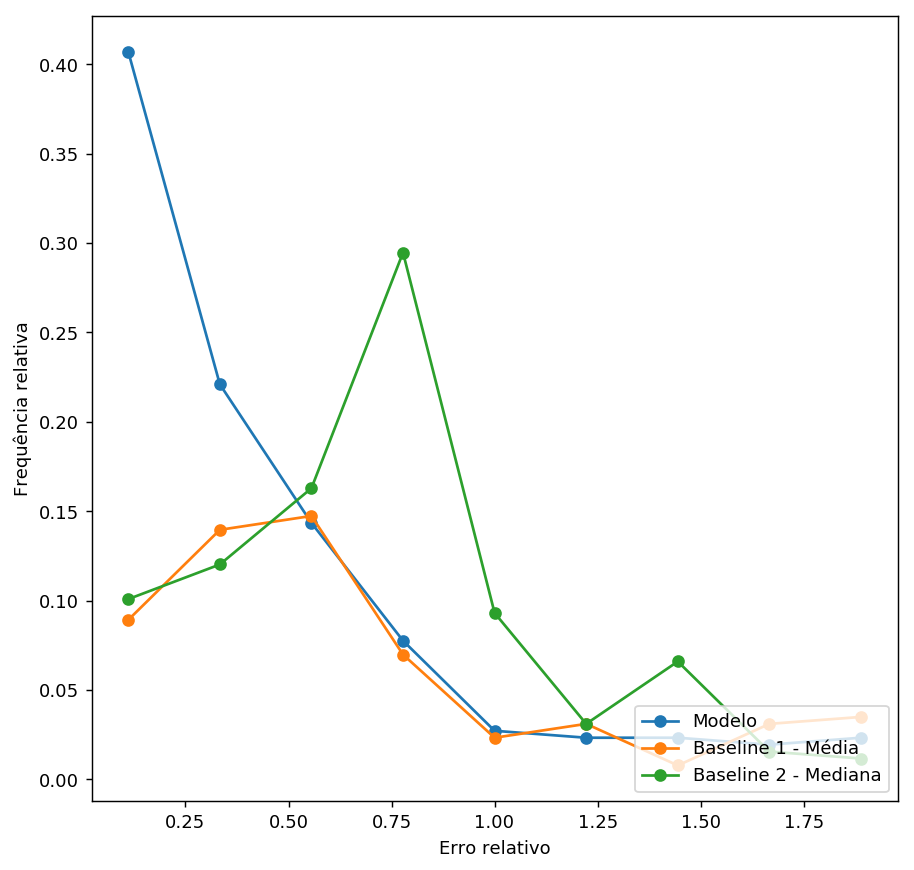

In [27]:
centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

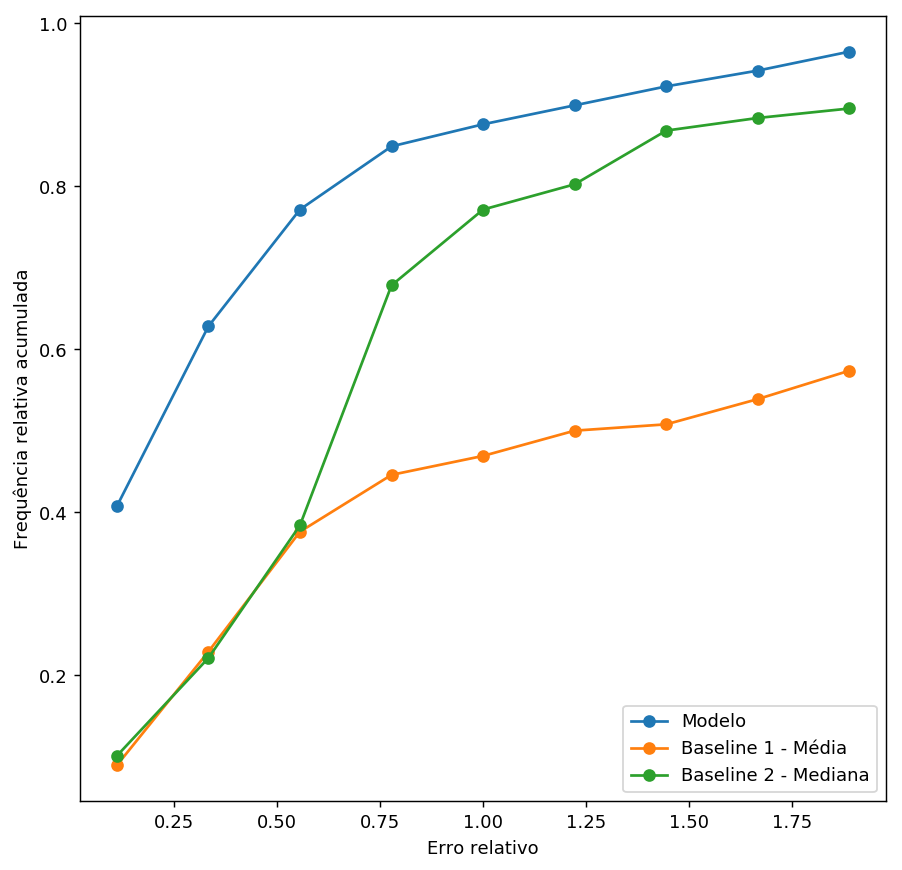

In [28]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median)

### Joined data summary

In [29]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,0.0,0.0,0.0,0.0,258.0,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,129.400302,241.390155,213.040581,0.938476,2.376850,0.569787,239.412605,274.498876,1191.980620,NaN,NaN,NaN,NaN,1.0,274.498876,139189.776905,433.220284,4.673488,4.615070,16.582395,23.552914,2.411101,506.425502,0.034266,6.445736,0.014236
std,220.858086,234.857762,304.568136,0.778509,2.483168,0.912990,198.081301,337.126244,960.715498,NaN,NaN,NaN,NaN,0.0,337.126244,95972.567663,256.826534,3.068652,0.319976,2.565510,2.185617,1.166309,214.624428,0.048195,14.039098,0.039663
min,0.096500,0.161124,1.605000,0.013449,0.000587,0.002228,27.591500,20.970000,1.000000,NaN,NaN,NaN,NaN,1.0,20.970000,1053.000000,48.000000,1.000000,1.000000,10.900000,17.000000,0.500000,40.800000,0.000665,1.000000,0.000000
25%,11.770250,153.336376,48.280000,0.502379,0.477571,0.124545,68.322250,57.705000,91.750000,NaN,NaN,NaN,NaN,1.0,57.705000,65433.000000,256.750000,4.760000,4.621333,14.425000,21.800000,1.500000,358.000000,0.005899,1.000000,0.000000
50%,46.387500,207.008876,79.460000,0.750204,1.331931,0.316198,154.054750,117.735000,1703.500000,NaN,NaN,NaN,NaN,1.0,117.735000,141485.441558,371.500000,4.760000,4.621333,16.000000,23.400000,2.300000,523.418147,0.015397,2.000000,0.002563
75%,156.013250,238.278876,291.390000,1.040361,3.757096,0.631907,413.909625,409.125000,1993.750000,NaN,NaN,NaN,NaN,1.0,409.125000,154200.250000,548.000000,4.760000,4.621333,18.400000,24.775000,3.200000,635.000000,0.045119,5.000000,0.008888
85%,255.306200,255.050624,411.814500,1.504561,4.839379,0.890581,474.290850,529.549500,2100.350000,NaN,NaN,NaN,NaN,1.0,529.549500,215015.550000,664.000000,4.760000,4.621333,19.600000,25.900000,3.600000,762.000000,0.065289,7.450000,0.013477
90%,302.787750,353.543124,510.307000,2.035194,6.076547,1.345403,533.166500,628.042000,2128.300000,NaN,NaN,NaN,NaN,1.0,628.042000,285006.300000,770.600000,4.760000,5.000000,20.600000,26.920000,3.930000,794.000000,0.083586,11.000000,0.020854
95%,537.136250,642.533624,799.297500,2.669059,7.554401,1.799968,610.724475,917.032500,2173.600000,NaN,NaN,NaN,NaN,1.0,917.032500,360324.400000,960.000000,5.000000,5.000000,21.500000,27.800000,4.600000,880.750000,0.111649,25.050000,0.092954


# Finished

In [30]:
finished_at = time.time()
duration = finished_at - started_at
print "Duração em segundos:"
print duration

Duração em segundos:
26.6104319096


<img src="files/image.png">